# micrograd exercises

My notes on the exercises from the [building micrograd video](https://www.youtube.com/watch?v=VMj-3S1tku0).<br>
Feel free to try on your own first, using [this empty notebook](https://colab.research.google.com/drive/1FPTx1RXtBfc4MaTkf7viZZD4U2F9gtKN?usp=sharing).

1. Watch the [building micrograd video](https://www.youtube.com/watch?v=VMj-3S1tku0) on YouTube
2. Come back and complete these exercises to level up :)

## Section 1: Derivatives

Here is a mathematical expression that takes 3 inputs and produces one output:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, exp, log

def f(a, b, c):
  return -a**3 + sin(3*b) - 1.0/c + b**2.5 - a**0.5

print(f(2, 3, 4))

6.336362190988558


Write the function $df$ that returns the analytical gradient of $f$ i.e. use your skills from calculus to take the derivative, then implement the formula.<br>
If you do not calculus, feel free to ask wolframalpha, e.g.: https://www.wolframalpha.com/input?i=d%2Fda%28sin%283*a%29%29%29

In [3]:
def gradf(a, b, c):
  df_da = -3*a**2 - 0.5*a**(-0.5)
  df_db = 3*cos(3*b) + 2.5*b**1.5
  df_dc = 1.0/c**2
  return [df_da, df_db, df_dc] # returns [df/da, df/db, df/dc]

# Expected answer is the list of
ans = [-12.353553390593273, 10.25699027111255, 0.0625]
yours = gradf(2, 3, 4)
for dim in range(3):
  ok = 'OK' if abs(yours[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {yours[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353553390593273
OK for dim 1: expected 10.25699027111255, yours returns 10.25699027111255
OK for dim 2: expected 0.0625, yours returns 0.0625


Now estimate the gradient numerically without any calculus, using the approximation we used in the video.<br>
You should not call the function `df` from the last cell.

In [4]:
# We discussed the approximation of the derivative/gradient as being:
# ~f'(x) = (f(x + h) - f(h)) / h
# This can be written into a lambda expression and applied to each dimension of the function

df_approx = lambda f, x, h: (f(x + h) - f(x)) / h

# Step size, i.e. the difference between x and x + h 
# -> the smaller the more precise approximation (until numerical imprecisions hit that is)
h = 1e-6

df_a = df_approx(lambda a: f(a, 3, 4), 2, h)
df_b = df_approx(lambda b: f(2, b, 4), 3, h)
df_c = df_approx(lambda c: f(2, 3, c), 4, h)

# -----------
numerical_grad = [df_a, df_b, df_c]
# -----------

for dim in range(3):
  ok = 'OK' if abs(numerical_grad[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad[dim]}")

OK for dim 0: expected -12.353553390593273, yours returns -12.353559348809995
OK for dim 1: expected 10.25699027111255, yours returns 10.256991666679482
OK for dim 2: expected 0.0625, yours returns 0.062499984743169534


There is an alternative formula that provides a much better numerical approximation to the derivative of a function.<br>
Learn about it here: https://en.wikipedia.org/wiki/Symmetric_derivative

**Implement it.**<br><br>
Confirm that for the *same step size $h$* this version gives a better approximation.

In [5]:
df_approx = lambda f, x, h: (f(x+h) - f(x-h)) / (2*h)

df_da = df_approx(lambda a: f(a, 3, 4), 2, 1e-5)
df_db = df_approx(lambda b: f(2, b, 4), 3, 1e-5)
df_dc = df_approx(lambda c: f(2, 3, c), 4, 1e-5)

# -----------
numerical_grad2 = [df_da, df_db, df_dc]
# -----------

for dim in range(3):
  ok = 'OK' if abs(numerical_grad2[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad2[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353553390820336
OK for dim 1: expected 10.25699027111255, yours returns 10.256990271617639
OK for dim 2: expected 0.0625, yours returns 0.06250000001983835


### Why is this approximation better?

The forward difference approximation $\frac{f(x+h)-f(x)}{h}$ worked for our simple problem setting, but there are limitations in its accuracy.<br>
This approximation only considers the function's behavior to the right of $x$, which can inhibit approximations for what is actually happening at $x$ itself in terms of slope.<br>
The slope of $x$ is not only informed by what comes after it, but also by what came before it in the function's graph. We don't consider this yet.

A more balanced approach is the central difference approximation method, $\frac{f(x+h)-f(x-h)}{2h}$.<br>
This approach considers the function's behavior on both sides of $x$, effectively taking a step $h$ not only forward, but also backward.

Let's see for a visual example on how the forward difference approximation might come around and bite us:
- We'll use an example function $f(x) = x^2$
- Our goal is to estimate the gradient at $x=0$ (the <p style="font-weight: bold; display: inline; color: #02FF02">green dot</p> in the plot)
- We'll use an exaggerated $h=1$ for the approximation to show how error might accumulate
- Our *old* approximation $\frac{f(x+h)-f(x)}{h}$ will be shown as a <p style="font-weight: bold; display: inline; color: #0055FF">blue line</p>
- An *improved and textbook* approximation $\frac{f(x+h)-f(x-h)}{2h}$ will be shown as a <p style="font-weight: bold; display: inline; color: #FF2200">red line</p>
- The true gradient is shown as a <p style="font-weight: bold; display: inline; color: #02FF02">green line</p>

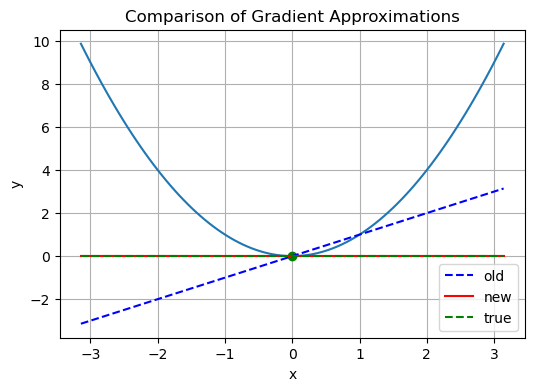

In [11]:
# Generate a function that has a plateau at 0,0
def f(x): return x**2
def df_old(a, h, x): return ((f(a + h) - f(a)) / h) * x + f(a)
def df_new(a, h, x): return ((f(a + h) - f(a - h)) / (2 * h)) * x + f(a)
def df_true(a, x): return (2 * a) * x + f(a)

# Prepare (x,y) lists to layout functions
x = np.linspace(-np.pi, np.pi, 100)
y = f(x)
poi = (0, f(0))
old, new, tru = df_old(poi[0], h, x), df_new(poi[0], h, x), df_true(poi[0], x)
h = 1

# Plot the function, approximations and reference point
fig = plt.figure(figsize=(6, 4))

ax = fig.add_subplot(111)
ax.plot(x, y)
ax.plot(poi[0], poi[1], 'go')
ax.plot(x, old, 'b--', label='old')
ax.plot(x, new, 'r-', label='new')
ax.plot(x, tru, 'g--', label='true')
ax.grid(True)
ax.legend()

plt.title("Comparison of Gradient Approximations")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

You can see that only considering $x$ and $x+h$ for calculating the slope/derivative/gradient at $x$ is just insufficient.<br>
Taking not only $x+h$, but also $x-h$ into account helps to address this.

## Section 2: Support for Softmax

Without referencing the code/video __too__ much, make the following two cells work.

You'll have to implement (in some cases re-implemented) a number of functions of the Value object, similar to what we've seen in the video.<br>
Instead of the squared error loss, this implements the __negative log likelihood loss__, which is very often used in classification.

Here's how I approached this.

1. I ran the code as-is, finding that the first hick-up was that `Value.exp()` is missing.
2. Implemented `.exp()`, re-ran and found `unsupported operand type(s) for +: 'int' and 'Value'` $\rightarrow$ `__radd__()` is missing.
3. Implemented `__radd__()`, re-ran and found `unsupported operand type(s) for /: 'Value' and 'Value'` $\rightarrow$ `__truediv__()` is missing.
4. Implemented `__truediv__()`, which required implementing `__pow__()`, which required implementing `__mul__()`; re-ran and found `'Value' object has no attribute 'log'`.
5. Implemented `log()`, re-ran and found `bad operand type for unary -: 'Value'` $\rightarrow$ `__neg__()` is missing.
6. Implemented `__neg__()`, re-ran and found `unsupported operand type(s) for *: 'int' and 'Value'` $\rightarrow$ `__rmul__()` is missing.
7. Implemented `__rmul__()`, re-ran and I was done.

In [95]:
# Value class starter code, with many functions taken out
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other): # exactly as in the video
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      # Gradient 'Splitter'
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  # ------
  # re-implement all the other functions needed for the exercises below
  # your code here
  # ------

  def exp(self):
    # Applying exp creates a child/result Value
    out = Value(exp(self.data), (self, ), 'exp')
    # out.data is self's gradient, as exp(x) means e^x -> gradient is e^x = out.data
    # out.grad is the gradient accumulated from earlier operations with out
    # out.data * out.grad is added as the accumulated gradient scaled by the self's gradient (chain rule)
    def _backward(): self.grad += out.data * out.grad
    out._backward = _backward
    return out

  def __radd__(self, other):
    # Just reverse the other + self notion
    return self + other

  def __truediv__(self, other):
    return self * other**-1

  def __pow__(self, other): # self ** other
    assert isinstance(other, (int, float)), "only supporting int/float powers (for now)"
    out = Value(self.data ** other, (self,), f'**{other}')
    def _backward(): self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward
    return out
  
  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    def _backward():
      self.grad += out.grad * other.data
      other.grad += out.grad * self.data
    out._backward = _backward
    return out
  
  def log(self):
    if self.data <= 0:
      raise ValueError("Cannot calculate log for non-positive Value")
    out = Value(log(self.data), (self,), 'log')
    def _backward(): self.grad += (1 / self.data) * out.grad
    out._backward = _backward
    return out

  def __neg__(self):
    return -1 * self

  def __rmul__(self, other):
    return self * other

  # ------

  def backward(self): 
    # exactly as in video
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [108]:
# this is the softmax function
# https://en.wikipedia.org/wiki/Softmax_function
def softmax(logits):
  counts = [logit.exp() for logit in logits]
  denominator = sum(counts)
  out = [c / denominator for c in counts]
  return out

# this is the negative log likelihood loss function, pervasive in classification
logits = [Value(0.0), Value(3.0), Value(-2.0), Value(1.0)]
probs = softmax(logits)
loss = -probs[3].log() # dim 3 acts as the label for this input example
loss.backward()
print(loss.data, '\n')
loss_approx = loss.data

ans = [0.041772570515350445, 0.8390245074625319, 0.005653302662216329, -0.8864503806400986]
for dim in range(4):
  ok = 'OK' if abs(logits[dim].grad - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {logits[dim].grad}")

2.1755153626167147 

OK for dim 0: expected 0.041772570515350445, yours returns 0.041772570515350445
OK for dim 1: expected 0.8390245074625319, yours returns 0.8390245074625319
OK for dim 2: expected 0.005653302662216329, yours returns 0.005653302662216329
OK for dim 3: expected -0.8864503806400986, yours returns -0.8864503806400986


Verify: The gradient using the library `torch` should be nearly exactly the same.

In [ ]:
import torch

logits = torch.tensor([0.0, 3.0, -2.0, 1.0], requires_grad=True)
probs = torch.nn.functional.softmax(logits, dim=0)
loss = -probs[3].log()
loss.backward()
print('OK' if torch.allclose(loss, torch.tensor(loss_approx)) else 'FALSE', 'for loss:', loss.item())

OK for loss: 2.1755154132843018


<b>Congrats! You leveled up!</b>

<center><br><br>Notebook by <a href="https://github.com/mk2112" target="_blank">mk2112</a>.</center>